Using Ensemble Learning Methods to classify target stars.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS464_Project/baseline_df.csv')
df

,kepid,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999,flux_1000,label
0,10797460.0,0.999956,0.999976,0.999927,0.999900,0.999946,0.999974,0.999817,1.000073,0.999805,...,0.999985,1.000216,0.999849,0.999988,0.999935,0.999952,1.000010,1.000180,0.999846,1.0
1,10848459.0,1.000090,NaN,0.999933,1.000010,1.000484,1.000211,0.999942,1.000306,1.000175,...,1.000171,1.000071,1.000015,1.000282,1.000190,0.999994,1.000019,1.000038,1.000262,0.0
2,10797460.0,1.000086,1.000074,0.999959,1.000018,1.000172,0.999981,0.999912,1.000094,1.000037,...,1.000001,0.999999,0.999876,1.000060,0.999987,0.999778,0.999984,1.000067,0.999960,1.0
3,6721123.0,0.999984,1.000008,0.999981,0.999999,0.999918,0.999998,0.999958,0.999988,0.999988,...,1.000084,0.999993,1.000052,1.000010,0.999980,0.999998,1.000053,0.999989,0.999980,0.0
4,10811496.0,1.000903,1.001195,1.000961,1.000900,1.001421,1.001033,1.001075,1.000885,1.001231,...,1.000613,1.000885,1.000414,1.000970,1.000982,1.001035,1.000859,1.000877,1.001111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,9938836.0,0.999991,0.999968,0.999968,1.000082,1.000008,0.999973,0.999983,0.999966,0.999955,...,0.999953,1.000111,1.000005,1.000054,1.000135,1.000041,0.999983,1.000055,1.000055,1.0
6810,10011213.0,0.999950,1.000026,1.000186,1.000040,0.999975,1.000035,1.000015,0.999532,1.000081,...,0.999934,0.999771,1.000136,0.999914,0.999816,1.000002,0.999912,1.000061,1.000179,1.0
6811,10028127.0,1.000221,1.000293,1.000170,1.000496,1.000185,1.000215,1.000107,0.999832,0.999766,...,1.000051,1.000172,1.000083,1.000107,NaN,NaN,0.998682,0.999515,0.999946,1.0
6812,10128825.0,1.000068,1.000005,1.000031,1.000033,0.999948,0.999934,0.999934,0.999871,0.999959,...,1.000044,1.000064,1.000121,0.999960,0.999939,1.000060,0.999922,1.000050,0.999950,1.0


In [ ]:
df_fill = df.fillna(df.mean()) # handle missing values

row_mean = df_fill.mean(axis=1)
row_median = df_fill.median(axis=1)
row_min = df_fill.min(axis=1)
row_max = df_fill.max(axis=1)
row_std = df_fill.std(axis = 1)

df_fill['row_mean'] = row_mean
df_fill['row_median'] = row_median
df_fill['row_std'] = row_std
df_fill['row_min'] = row_min
df_fill['row_max'] = row_max


X = df_fill.drop(columns=['kepid', 'label'])
y = df_fill['label']

X.tail(9)

,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,...,flux_996,flux_997,flux_998,flux_999,flux_1000,row_mean,row_median,row_std,row_min,row_max
6805,1.000160,1.000162,0.999940,1.000199,1.000043,0.999839,1.000001,1.000127,1.000274,1.000092,...,0.999884,1.000019,1.000222,1.000159,0.999994,9887.913181,1.000002,312964.142047,0.999605,9906688.0
6806,1.000043,0.999942,1.000088,0.999855,0.999936,1.000089,1.000107,1.000033,0.999897,1.000018,...,1.000003,1.000056,0.999972,0.999997,0.999956,2281.395177,1.000036,72184.504685,0.987423,2284957.0
6807,1.000025,1.000336,1.000389,1.000757,1.000275,0.999965,0.999758,0.999840,0.999726,0.999759,...,0.999738,0.999691,0.999853,0.999900,0.999766,3657.535935,1.000013,115745.390853,0.999047,3663850.0
6808,0.999677,0.999779,1.000018,1.000161,1.000023,1.000065,1.000231,1.000259,1.000221,1.000032,...,1.000191,1.000105,1.000061,0.999818,0.999643,12144.990927,1.000007,384410.549910,0.985817,12168280.0
6809,0.999991,0.999968,0.999968,1.000082,1.000008,0.999973,0.999983,0.999966,0.999955,1.000071,...,1.000135,1.000041,0.999983,1.000055,1.000055,9919.997010,1.000002,313979.735983,0.999814,9938836.0
6810,0.999950,1.000026,1.000186,1.000040,0.999975,1.000035,1.000015,0.999532,1.000081,0.999916,...,0.999816,1.000002,0.999912,1.000061,1.000179,9992.229528,1.000005,316266.212351,0.992746,10011213.0
6811,1.000221,1.000293,1.000170,1.000496,1.000185,1.000215,1.000107,0.999832,0.999766,0.999886,...,0.996926,0.996905,0.998682,0.999515,0.999946,10009.109728,1.000012,316800.545929,0.995842,10028127.0
6812,1.000068,1.000005,1.000031,1.000033,0.999948,0.999934,0.999934,0.999871,0.999959,1.000064,...,0.999939,1.000060,0.999922,1.000050,0.999950,10109.606790,1.000000,319981.716704,0.999763,10128825.0
6813,1.000142,1.000085,0.999859,0.999556,0.996865,0.996872,0.996938,0.996992,0.997073,1.000249,...,1.000175,0.999813,0.999946,0.999950,1.000188,10136.014920,1.000025,320817.651480,0.994428,10155286.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (5451, 1005)
X_test.shape: (1363, 1005)


In [ ]:
class_counts = y_test.value_counts()
print(class_counts)

1.0    904
0.0    459
Name: label, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Model: Scikit Learn's RandomForestClassifier

In [ ]:
# Create RandomForestClassifier
clf = RandomForestClassifier(max_depth=23, # maximum depth of the tree
                             n_estimators=100, # n trees in the forest
                             min_samples_leaf=1, # minimum n samples requred to be at a leaf node
                             max_features='sqrt', # n features to consider when looking for best split
                             random_state=34, # randomness in sampling of features to consider when looking for best split at each node
                             verbose=1)

# Train
clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    8.4s


RandomForestClassifier(max_depth=23, random_state=34, verbose=1)

In [ ]:
# Make preditions on the training set
y_train_pred = clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_val_pred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
test_accuracy

0.9838591342626559

In [ ]:
train_accuracy

1.0

Confusion Matrix


<Axes: xlabel='Predicted', ylabel='Actual'>

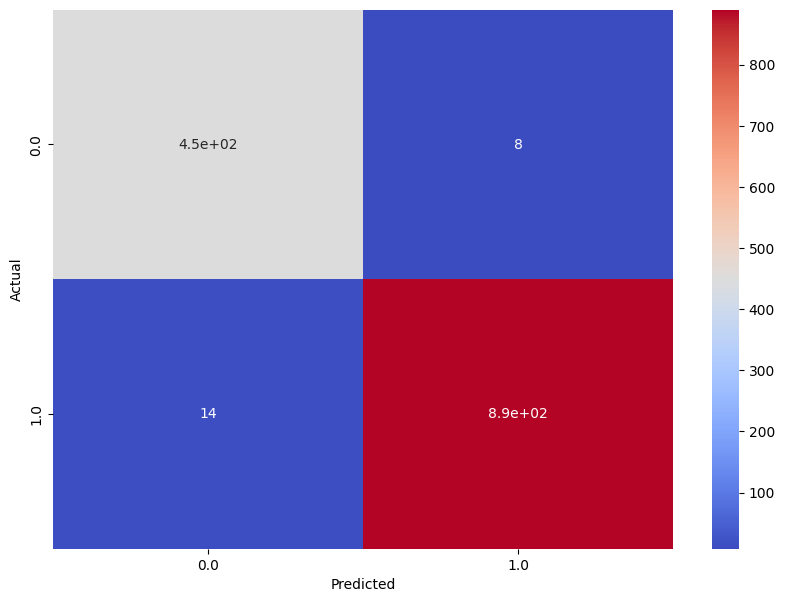

In [ ]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix')
matrix = confusion_matrix(y_test, y_val_pred)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, cmap='coolwarm', annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(f'Classification Report: {clf}]\n')
print(f'{classification_report(y_test, y_val_pred)}')

Classification Report: RandomForestClassifier(max_depth=23, random_state=34, verbose=1)]

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       459
         1.0       0.99      0.98      0.99       904

    accuracy                           0.98      1363
   macro avg       0.98      0.98      0.98      1363
weighted avg       0.98      0.98      0.98      1363



## Hyperparameter Tuning
- train_accuracy of 1 indicates overfitting.

<function matplotlib.pyplot.show(close=None, block=None)>

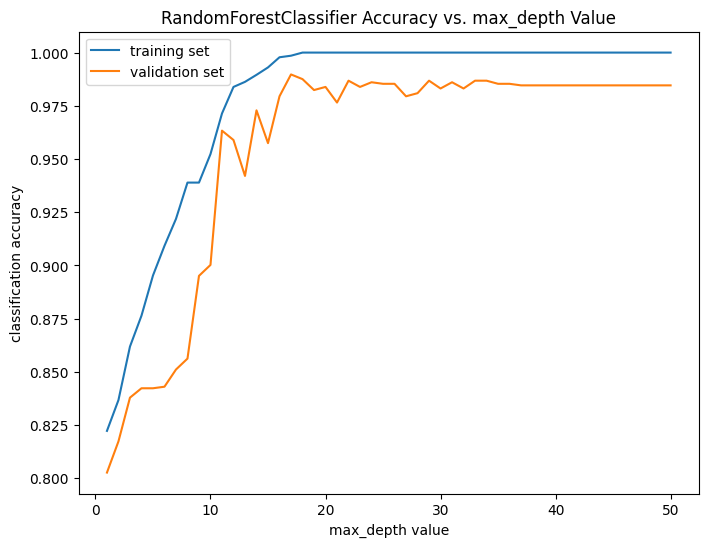

In [ ]:
max_depth_values = range(1, 51)
train_accuracy_scores_md = []
test_accuracy_scores_md = []

for max_depth in max_depth_values:
  clf = RandomForestClassifier(max_depth=max_depth, random_state=34)
  clf.fit(X_train_scaled, y_train)

  # make predictions on the training set
  y_train_pred = clf.predict(X_train_scaled)

  train_accuracy_scores_md.append(accuracy_score(y_train, y_train_pred))

  # make predictions on the test set
  y_test_pred = clf.predict(X_test_scaled)
  test_accuracy_scores_md.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (8, 6))
plt.plot(max_depth_values, train_accuracy_scores_md, linestyle='-', label='training set')
plt.plot(max_depth_values, test_accuracy_scores_md, linestyle='-', label='validation set')
plt.title('RandomForestClassifier Accuracy vs. max_depth Value')
plt.xlabel('max_depth value')
plt.ylabel('classification accuracy')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

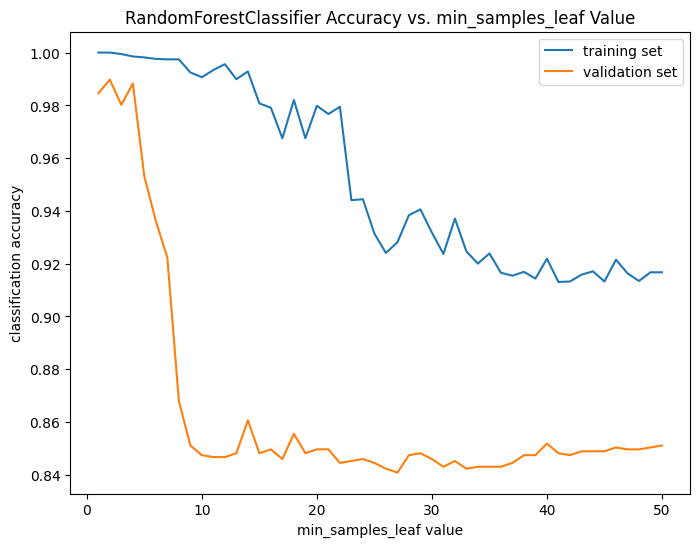

In [ ]:
min_samples_leaf_values = range(1, 51)
train_accuracy_scores_leaf = []
test_accuracy_scores_leaf = []

for min_samples_leaf in min_samples_leaf_values:
  clf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=34)
  clf.fit(X_train_scaled, y_train)

  # make predictions on the training set
  y_train_pred = clf.predict(X_train_scaled)

  train_accuracy_scores_leaf.append(accuracy_score(y_train, y_train_pred))

  # make predictions on the test set
  y_test_pred = clf.predict(X_test_scaled)
  test_accuracy_scores_leaf.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (8, 6))
plt.plot(min_samples_leaf_values, train_accuracy_scores_leaf, linestyle='-', label='training set')
plt.plot(min_samples_leaf_values, test_accuracy_scores_leaf, linestyle='-', label='validation set')
plt.title('RandomForestClassifier Accuracy vs. min_samples_leaf Value')
plt.xlabel('min_samples_leaf value')
plt.ylabel('classification accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

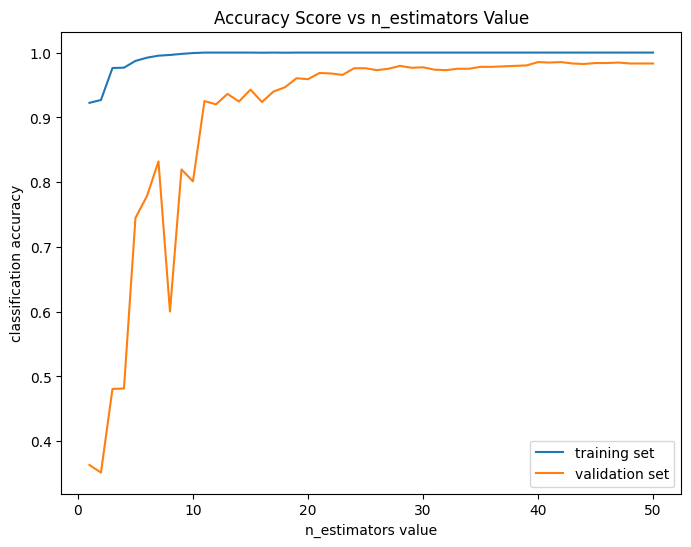

In [ ]:
n_estimators_values = range(1, 51)
train_accuracy_scores_est = []
test_accuracy_scores_est = []

for n_estimators in n_estimators_values:
  clf = RandomForestClassifier(n_estimators=n_estimators, random_state=34)
  clf.fit(X_train_scaled, y_train)

  y_train_pred = clf.predict(X_train_scaled)
  train_accuracy_scores_est.append(accuracy_score(y_train, y_train_pred))

  y_test_pred = clf.predict(X_test_scaled)
  test_accuracy_scores_est.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (8, 6))
plt.plot(n_estimators_values, train_accuracy_scores_est, linestyle='-', label='training set')
plt.plot(n_estimators_values, test_accuracy_scores_est, linestyle='-', label='validation set')
plt.title('Accuracy Score vs n_estimators Value')
plt.xlabel('n_estimators value')
plt.ylabel('classification accuracy')
plt.legend()
plt.show

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


<function matplotlib.pyplot.show(close=None, block=None)>

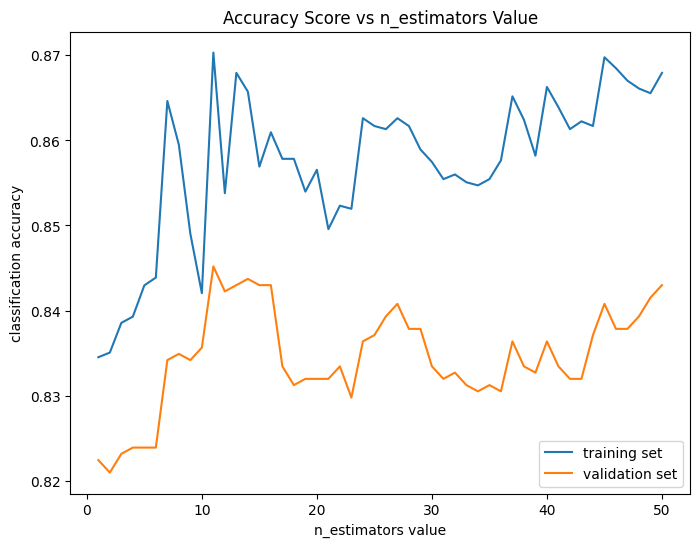

In [ ]:
# Using the best results from the previous steps
train_accuracy_scores_est = []
test_accuracy_scores_est = []

for n_estimators in n_estimators_values:
  # Create RandomForestClassifier
  clf = RandomForestClassifier(max_depth=3, # maximum depth of the tree
                             n_estimators=n_estimators, # n trees in the forest
                             min_samples_leaf=50, # minimum n samples requred to be at a leaf node
                             max_features='sqrt', # n features to consider when looking for best split
                             random_state=34, # randomness in sampling of features to consider when looking for best split at each node
                             verbose=1)
  clf.fit(X_train_scaled, y_train)

  y_train_pred = clf.predict(X_train_scaled)
  train_accuracy_scores_est.append(accuracy_score(y_train, y_train_pred))

  y_test_pred = clf.predict(X_test_scaled)
  test_accuracy_scores_est.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (8, 6))
plt.plot(n_estimators_values, train_accuracy_scores_est, linestyle='-', label='training set')
plt.plot(n_estimators_values, test_accuracy_scores_est, linestyle='-', label='validation set')
plt.title('Accuracy Score vs n_estimators Value')
plt.xlabel('n_estimators value')
plt.ylabel('classification accuracy')
plt.legend()
plt.show

In [ ]:
# Create RandomForestClassifier
model = RandomForestClassifier(max_depth=5, # maximum depth of the tree
                             n_estimators=18, # n trees in the forest
                             min_samples_leaf=50, # minimum n samples requred to be at a leaf node
                             max_features='sqrt', # n features to consider when looking for best split
                             random_state=34, # randomness in sampling of features to consider when looking for best split at each node
                             verbose=1)

# Train
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, n_estimators=18,
                       random_state=34, verbose=1)

In [ ]:
# Make preditions on the training set
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation set
y_val_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_val_pred)

In [ ]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.8497523390203633
Test Accuracy: 0.826118855465884


Confusion Matrix


<Axes: xlabel='Predicted', ylabel='Actual'>

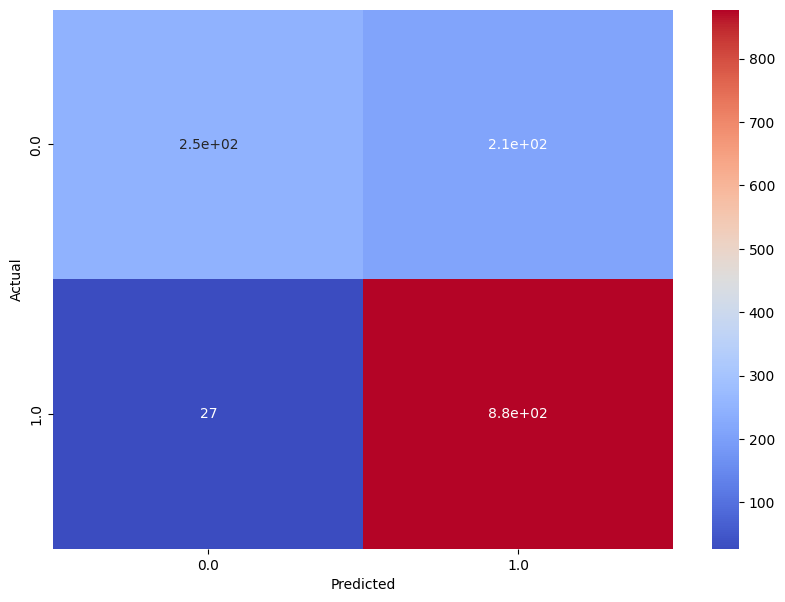

In [ ]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix')
matrix = confusion_matrix(y_test, y_val_pred)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, cmap='coolwarm', annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(f'Classification Report: {model}]\n')
print(f'{classification_report(y_test, y_val_pred)}')

Classification Report: RandomForestClassifier(max_depth=5, min_samples_leaf=50, n_estimators=18,
                       random_state=34, verbose=1)]

              precision    recall  f1-score   support

         0.0       0.90      0.54      0.68       459
         1.0       0.81      0.97      0.88       904

    accuracy                           0.83      1363
   macro avg       0.85      0.76      0.78      1363
weighted avg       0.84      0.83      0.81      1363



Evaluate model performance over entire dataset

In [ ]:
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(6814, 1001)

In [ ]:
y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8410625183445847


Confusion Matrix


<Axes: xlabel='Predicted', ylabel='Actual'>

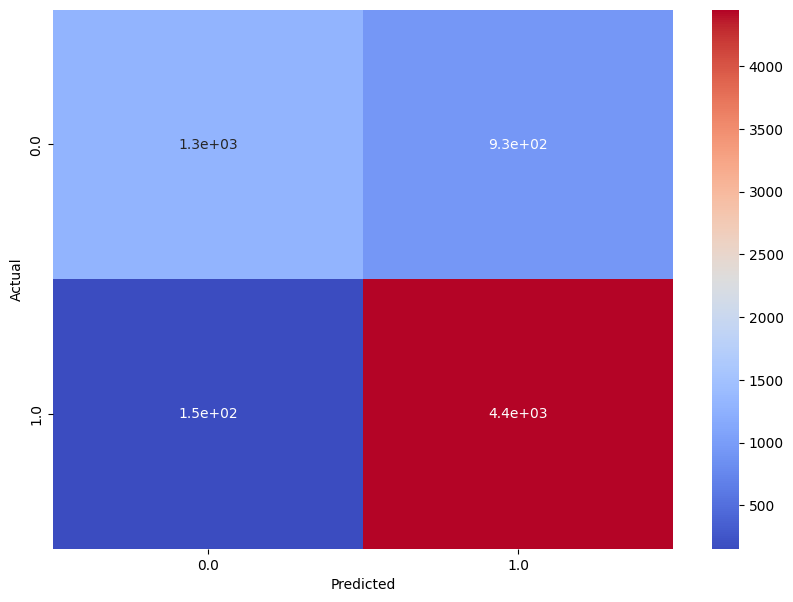

In [ ]:
print('Confusion Matrix')
matrix = confusion_matrix(y, y_pred)
df_cm = pd.DataFrame(matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, cmap='coolwarm', annot=True)